PROBLEM SET 1.2

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("classic")
plt.style.use("../pyplot.mplstyle")

In [2]:
def visualize(ex: np.ndarray, hy: np.ndarray) -> None:
    """Data visualization with Matplotlib"""

    fig, (ax1, ax2) = plt.subplots(2, sharex=False, gridspec_kw={"hspace": 0.2})
    fig.suptitle(r"FDTD simulation of a pulse in free space after 100 time steps")
    ax1.plot(ex, "k", lw=1)
    ax1.text(100, 0.5, "T = 100", horizontalalignment="center")
    ax1.set(xlim=(0, 200), ylim=(-1.2, 1.2), ylabel=r"E$_x$")
    ax1.set(xticks=range(0, 220, 20), yticks=np.arange(-1, 1.2, 1))
    ax2.plot(hy, "k", lw=1)
    ax2.set(xlim=(0, 200), ylim=(-1.2, 1.2), xlabel=r"FDTD cells", ylabel=r"H$_y$")
    ax2.set(xticks=range(0, 220, 20), yticks=np.arange(-1, 1.2, 1))
    plt.subplots_adjust(bottom=0.2, hspace=0.45)
    plt.show()

In [3]:
def gaussian(t: int, t0: int = 40, sigma: float = 12) -> float:
    """
    Gaussian pulse source

    :param int t: an integer counter that serves as the temporal index
    :param int t0: time step at which gaussian function is maximum, default 40
    :param float sigma: width of the gaussian pulse, default 12

    :return: gaussian pulse
    :rtype: float

    """

    return np.exp(-0.5 * ((t - t0) / sigma) ** 2)

1. In fd1d_1_1.py, go to the governing equations, Eq. (1.9a) and (1.9b), and change the factor 0.5 to 1.0. What happens? Change it to 1.1. Now what happens? Change it to 0.25 and see what happens.

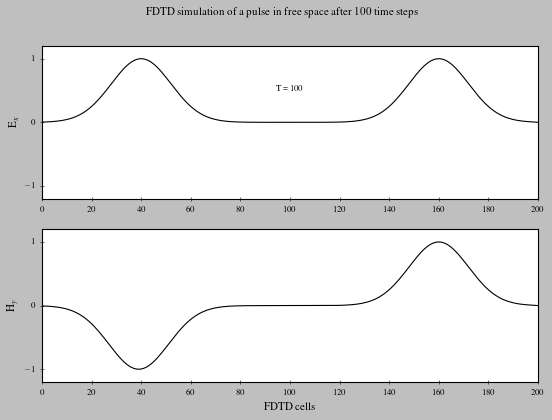

In [4]:
def simulate(ke: int, ex: np.ndarray, hy: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Finite-difference time-domain method

    :param int ke: number of electric and magnetic field nodes
    :param np.ndarray ex: electric field oriented in the x direction
    :param np.ndarray hy: magnetic field oriented in the y direction

    :return: ex, hy: electric and magnetic field
    :rtype: tuple[np.ndarray, np.ndarray]

    """

    kc: int = ke // 2
    nsteps: int = 100

    # FDTD simulation loop
    for t in range(1, nsteps + 1):

        # calculate the Ex field
        ex[1:ke] = ex[1:ke] + 1.0 * (hy[0:ke-1] - hy[1:ke])

        # put a Gaussian pulse in the middle
        ex[kc] = gaussian(t, 40, 12)

        # calculate the Hy field
        hy[0:ke-1] = hy[0:ke-1] + 1.0 * (ex[0:ke-1] - ex[1:ke])

    return ex, hy


def main():
    """Main function"""

    ke = 201
    ex = np.zeros(ke, dtype=np.float64)
    hy = np.zeros(ke, dtype=np.float64)

    ex, hy = simulate(ke, ex, hy)
    visualize(ex, hy)


if __name__ == "__main__":
    main()

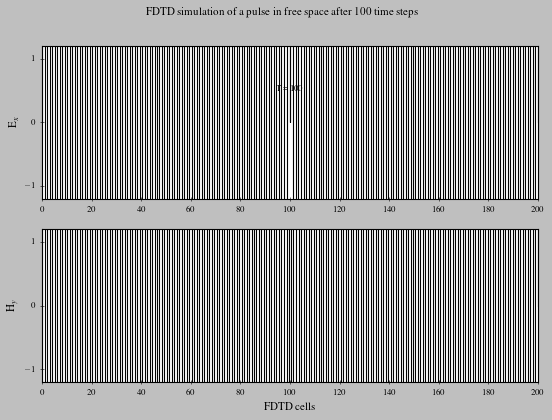

In [5]:
def simulate(ke: int, ex: np.ndarray, hy: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Finite-difference time-domain method

    :param int ke: number of electric and magnetic field nodes
    :param np.ndarray ex: electric field oriented in the x direction
    :param np.ndarray hy: magnetic field oriented in the y direction

    :return: ex, hy: electric and magnetic field
    :rtype: tuple[np.ndarray, np.ndarray]

    """

    kc: int = ke // 2
    nsteps: int = 100

    # FDTD simulation loop
    for t in range(1, nsteps + 1):

        # calculate the Ex field
        ex[1:ke] = ex[1:ke] + 1.1 * (hy[0:ke-1] - hy[1:ke])

        # put a Gaussian pulse in the middle
        ex[kc] = gaussian(t, 40, 12)

        # calculate the Hy field
        hy[0:ke-1] = hy[0:ke-1] + 1.1 * (ex[0:ke-1] - ex[1:ke])

    return ex, hy


def main():
    """Main function"""

    ke = 201
    ex = np.zeros(ke, dtype=np.float64)
    hy = np.zeros(ke, dtype=np.float64)

    ex, hy = simulate(ke, ex, hy)
    visualize(ex, hy)


if __name__ == "__main__":
    main()

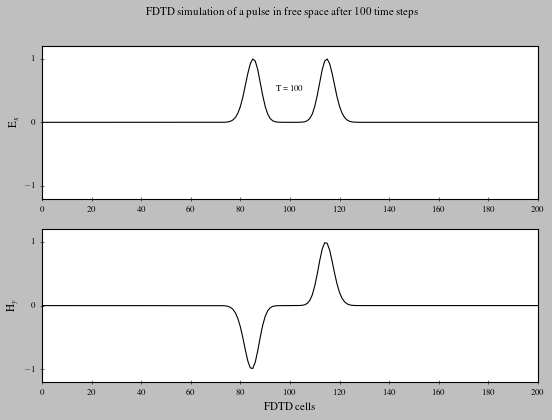

In [6]:
def simulate(ke: int, ex: np.ndarray, hy: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Finite-difference time-domain method

    :param int ke: number of electric and magnetic field nodes
    :param np.ndarray ex: electric field oriented in the x direction
    :param np.ndarray hy: magnetic field oriented in the y direction

    :return: ex, hy: electric and magnetic field
    :rtype: tuple[np.ndarray, np.ndarray]

    """

    kc: int = ke // 2
    nsteps: int = 100

    # FDTD simulation loop
    for t in range(1, nsteps + 1):

        # calculate the Ex field
        ex[1:ke] = ex[1:ke] + 0.25 * (hy[0:ke-1] - hy[1:ke])

        # put a Gaussian pulse in the middle
        ex[kc] = gaussian(t, 40, 12)

        # calculate the Hy field
        hy[0:ke-1] = hy[0:ke-1] + 0.25 * (ex[0:ke-1] - ex[1:ke])

    return ex, hy


def main():
    """Main function"""

    ke = 201
    ex = np.zeros(ke, dtype=np.float64)
    hy = np.zeros(ke, dtype=np.float64)

    ex, hy = simulate(ke, ex, hy)
    visualize(ex, hy)


if __name__ == "__main__":
    main()